# Recurrent Neural Network

## Part 1 - Data Preprocessing

In [ ]:
!pip show numpy

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

### Importing the training set

In [2]:
df = pd.read_csv('HOUST.csv')
# split data into training and testing sets
dataset_train, dataset_test = train_test_split(df, test_size=0.1, shuffle=False)
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(50, 615):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint
import os

### Initialising the RNN

In [8]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [14]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [16]:
model_file_last = "model_last.h5"
model_file_best = "model_best.h5"

# create a checkpoint for the best model
checkpoint_best = ModelCheckpoint(model_file_best, save_weights_only=False, save_best_only=True, mode='min', monitor='val_loss')

# create a checkpoint for the last model
checkpoint_last = ModelCheckpoint(model_file_last, save_weights_only=False, save_best_only=False)

# load the last model if it exists
if os.path.isfile(model_file_last):
    regressor.load_weights(model_file_last)

# train the model with checkpoint
regressor.fit(X_train, y_train, epochs=100, batch_size=4, callbacks=[checkpoint_last, checkpoint_best])

# load the best model if it exists and is better than the last model
if os.path.isfile(model_file_best):
    regressor.load_weights(model_file_best)


Epoch 1/100
142/142 [==============================] - 14s 32ms/step - loss: 0.0409
Epoch 2/100
142/142 [==============================] - 4s 28ms/step - loss: 0.0196
Epoch 3/100
142/142 [==============================] - 4s 29ms/step - loss: 0.0179
Epoch 4/100
142/142 [==============================] - 4s 31ms/step - loss: 0.0143
Epoch 5/100
142/142 [==============================] - 4s 30ms/step - loss: 0.0148
Epoch 6/100
142/142 [==============================] - 5s 32ms/step - loss: 0.0118
Epoch 7/100
142/142 [==============================] - 5s 33ms/step - loss: 0.0115
Epoch 8/100
142/142 [==============================] - 4s 30ms/step - loss: 0.0103
Epoch 9/100
142/142 [==============================] - 4s 30ms/step - loss: 0.0108
Epoch 10/100
142/142 [==============================] - 4s 27ms/step - loss: 0.0084
Epoch 11/100
142/142 [==============================] - 4s 28ms/step - loss: 0.0076
Epoch 12/100
142/142 [==============================] - 4s 32ms/step - loss: 0.0073


## Part 3 - Making the predictions and visualising the results

### Getting the real Houst 

In [17]:
real_houst_data = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [18]:
dataset_total = pd.concat((dataset_train['HOUST'], dataset_test['HOUST']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 50:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(50, 122):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

### Visualising the results

In [ ]:
plt.plot(real_houst_data, color = 'red', label = 'Real HOust')
plt.plot(predicted, color = 'blue', label = 'Predicted Houst')
plt.title('HOUST Prediction')
plt.xlabel('Date')
plt.ylabel('HOUST')
plt.legend()
plt.show()

In [20]:
# save predicted values
predicted_df = pd.DataFrame(predicted)

In [21]:
#convertt all value on predicted_df to int
predicted_df = predicted_df.astype(int)
predicted_df.head()

,0
0,1219
1,1135
2,1251
3,1176
4,1231


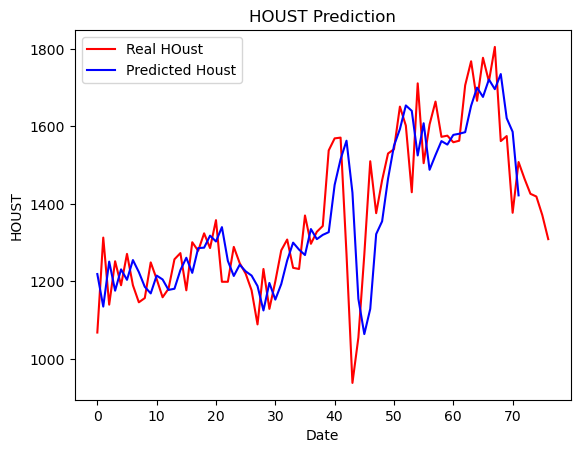

In [22]:
plt.plot(real_houst_data, color = 'red', label = 'Real HOust')
plt.plot(predicted_df, color = 'blue', label = 'Predicted Houst')
plt.title('HOUST Prediction')
plt.xlabel('Date')
plt.ylabel('HOUST')
plt.legend()
plt.show()

In [23]:
##regressor.save('model5.h5')